# Prosjekt 1: Datahåndtering og statistikk
_Jakob Ruth_ 



### Forsøksbeskrivelse:
 Dataen er samlet inn tideligere og dette er en kort oppsumering av hva som ble gjort. Vi skulle bygge vårt eget CanSat shield og dra til Andøya og gjennomføre et slipp av CanSat-en fra 120m. CanSat-shieldet skal kobles til en Arduino Uno og plasseres i en tom brusboks, derav navnet CanSat, etter brusboks på engelsk. På Andøya skulle CanSat-en slippes med fallskjerm fra en drone og gjøre målinger på vei ned. Vår CanSat skulle bygges for å gjennomføre «Primary Mission», altså å gjøre målinger av trykk, temperatur og høyde. CanSat-en tilfredsstiller altså «Primary Mission» kravene til ESA (European Space Agency). Du kan lese mer om CanSat som skoleprosjekt her: https://www.esero.no/prosjekter/cansat/

### Hypotese
Vår hypotese er at CanSat-en vil sende 10 målinger i sekundet til pc-en vi bruker for å mota dataene, ettersom vi i koden har lagt inn et delay på 100 millisekunder mellom hver sending. Vi forventer også at fallskjermen vil sakke ned fallet og at CanSat-en vil falle sakte nok til å ikke bli skadet. Med utgangspunkt i vekten til CanSat-en vil den falle med en hastighet på $48,51ms^-1$ uten fallskjerm. Med fallskjerm burde den falle saktere enn det. Vi brude se en sammenheng mellom: temperatur og høyde, høyde og trykk, temperatur, samt en sammenheng mellom de ulike temperatur sensorene. Jeg tror at tempereaturen synker når høyden blir større

Først importerer jeg de nødevendige bibliotekene

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Deretter leser jeg og fromaterer dataene riktig

In [3]:
df=pd.read_csv("Cansat_Drop.csv", sep=";", decimal=",", skiprows=1, names=["Callsign_number", "ms", "temp1", "temp2", "temp3","pressure","moh", ""])
df.pop(df.columns[-1]) #Det var en kolonne som plutselig eksisterte i data settet eller noe, fjernes her
df["ms"]=df["ms"]-560986 #Gjør at tiden starter ved 0ms i stedenfor 560986
avg_temp=df[['temp1', 'temp2', 'temp3']].mean(axis=1) #Lager en gjennomsnitts temperatur
csfont = {'fontname':'Times New Roman'}


Skjekke de første fem radene og ser etter at alt ser riktig ut, skjekker også infoen til datasettet for å skjekke at alt har riktig formatering

In [4]:
df.head()

,Callsign_number,ms,temp1,temp2,temp3,pressure,moh
0,CanSat 2100,0,16.22,13.05,14.37,102152.32,40.62
1,CanSat 2101,266,16.22,13.05,14.37,102150.21,40.46
2,CanSat 2102,534,16.22,13.05,14.37,102152.08,40.47
3,CanSat 2103,799,16.22,13.54,14.38,102153.14,40.34
4,CanSat 2104,1068,16.22,13.05,14.38,102152.63,40.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Callsign_number  401 non-null    object 
 1   ms               401 non-null    int64  
 2   temp1            401 non-null    float64
 3   temp2            401 non-null    float64
 4   temp3            401 non-null    float64
 5   pressure         401 non-null    float64
 6   moh              401 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.1+ KB


### Sammenhenger

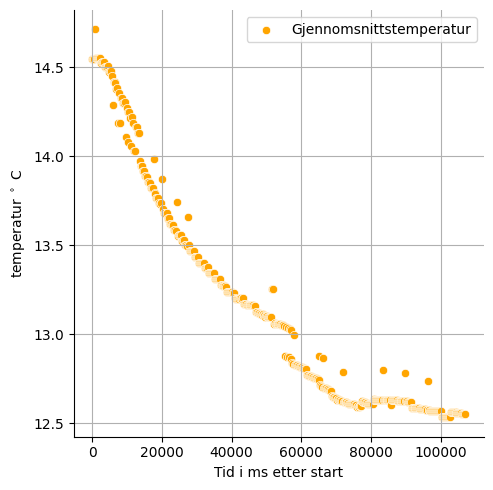

In [6]:
sns.relplot(data=df, x= "ms", y=avg_temp, color="orange", label="Gjennomsnittstemperatur")
plt.xlabel("Tid i ms etter start")
plt.ylabel("temperatur $^\circ$ C")
plt.legend()
plt.grid()
plt.show()

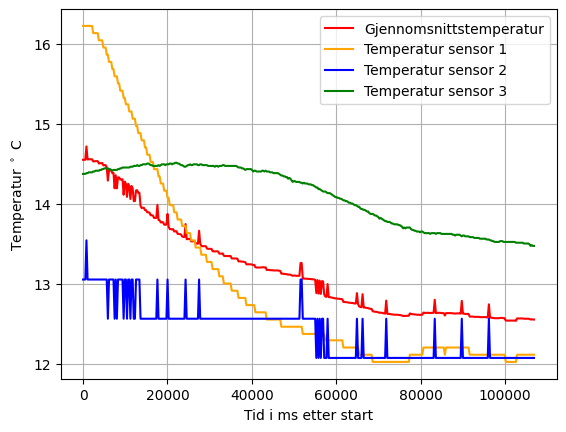

In [7]:
sns.lineplot(data=df, y=avg_temp, x= "ms", color="red", label="Gjennomsnittstemperatur")
sns.lineplot(data=df, y="temp1", x="ms", color="orange", label="Temperatur sensor 1")
sns.lineplot(data=df, y="temp2", x="ms", color="blue", label="Temperatur sensor 2")
sns.lineplot(data=df, y="temp3", x="ms", color="green", label="Temperatur sensor 3")
plt.xlabel("Tid i ms etter start")
plt.ylabel("Temperatur $^\circ$ C")
plt.legend()
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

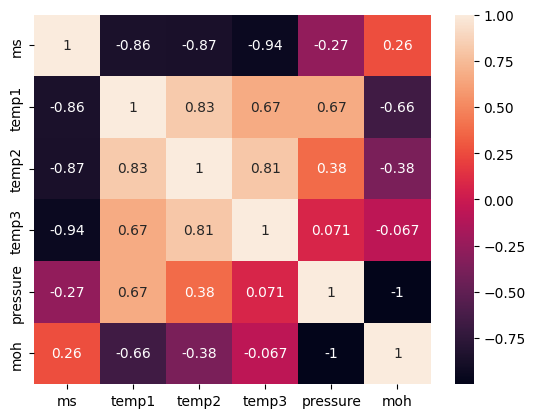

In [8]:
korrelasjon_temp1_temp2=df.corr(numeric_only=True)
sns.heatmap(korrelasjon_temp1_temp2, annot=True)
plt.show

In [9]:
#sns.relplot(data=df,  x="temp1",y="temp3", kind="scatter")